# Game search data collector on Metacritic

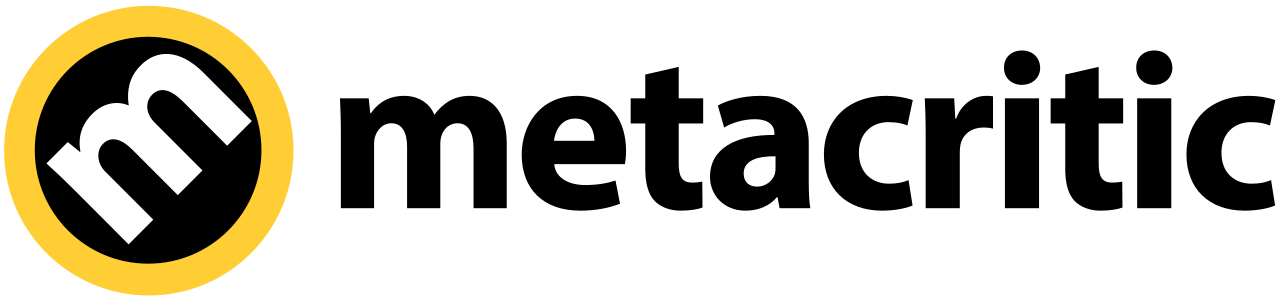

[Metacritic official page ](https://www.metacritic.com/)

#Objective



*   Initially, the data available on the Metacritic game search page will be collected
*   The expected output is the page link of each available game



# 1. Library imports



*   Pandas: responsible for data manipulation/analysis through the dataframe format;
*   re: module to perform matching operations (on text) through regular expressions ;
*   time: module used mainly for calculating processing time and creating delays;
*   requests: HTTP library used to download the page's source code;
*   bs4 (Beautiful Soup 4): library used to extract data from HTML and XML files, used as a parser to navigate within the files created by requests.



In [ ]:
import pandas as pd
import numpy as np
import re
import time

import requests as rq
import bs4 as bs4 
import json

# 2. Data collection on the search page

###In this step, we will navigate through the game search page to collect the information available in each of them.

*   First, some variables are created to help organize the data that will be extracted:



In [ ]:
url = "https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page={page}" 

*   On the date the site was accessed, we noticed that there were 193 pages in the desired category
*  The two-second delay was introduced to prevent our access from being blocked by the site's security when making too many requests in a small amount of time.


In [ ]:
for page in range(0,194):
    urll = url.format(page=page) 
    print(urll)

    response = rq.get(urll, headers={'User-Agent':'test'})

    with open("{}.html".format(page), 'w+') as output:
      output.write(response.text)
    time.sleep(2)

# 3. Processing raw data

###After browsing through the page's source code, it is possible to identify some tags that "store" each site's information. In our case, we get the link to the page of each game on its respective platform.


*   With the help of bs4, the extracted data was saved in a JSON file.



In [ ]:
for page in range(0,193):
  with open("/content/drive/MyDrive/Colab Notebooks/Projetos/dados/{}.html".format(page), 'r+') as inp:
    page_html = inp.read() 

    parsed = bs4.BeautifulSoup(page_html) 
    tr = parsed.find_all('tr')
    c = 0
    while c < 198:
      for v in tr:
        game_link = tr[c]
        if len(game_link) > 2:
          link = game_link.a['href']
          with open("/content/drive/MyDrive/Colab Notebooks/Projetos/dados/parsed_games.json", 'a+') as output:
            data = {"link": link}
            output.write("{}\n".format(json.dumps(data))) 
        if c < 198:
          c +=2
        else:
          break

# 4. Checking results

In [ ]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Projetos/Recomendação jogos/parsed_games.json", lines=True)
lista_de_links = df['link'].unique()
df.shape, len(lista_de_links)

((38460, 1), 19259)

We may notice that there are some duplicate records, but we will deal with this in another step.

In [ ]:
df.head()

,link
0,/game/nintendo-64/the-legend-of-zelda-ocarina-...
1,/game/playstation/tony-hawks-pro-skater-2
2,/game/playstation-3/grand-theft-auto-iv
3,/game/dreamcast/soulcalibur
4,/game/xbox-360/grand-theft-auto-iv


In [ ]:
df.tail()

,link
38455,/game/xbox-360/rogue-warrior
38456,/game/xbox/sneakers
38457,/game/ds/thundercats
38458,/game/pc/american-mcgee-presents-bad-day-la
38459,/game/playstation/mortal-kombat-special-forces
